## LOAD THE LIBRARIES

In [1]:
from bs4 import BeautifulSoup
import requests

**Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.**

In [2]:
import spacy 
nlp = spacy.load('en_core_web_sm') 

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Using TextBlob to find the sentiment polarity 

In [5]:
from textblob import TextBlob

# Taking the news articles for a specific month from various newspapers


### In this case,we are considering the month 'March' 

In [6]:
date_list=[]
for i in range(1,31):
    date_list.append('03-{}-20'.format(i))

In [7]:
day_of_month=[]
for i in range(1,31):
    day_of_month.append(i)

### FOR CNN NEWS 

In [8]:
cnn_url=[]
for i in range(1,31):
    if i in [1,2,3,4,5,6,7,8,9]:
        i='0{}'.format(i)
    cnn_url.append("https://www.cnn.com/world/live-news/coronavirus-outbreak-03-{}-20-intl-hnk/index.html".format(i))

In [9]:
news_dict=[]
for i in range(0,30):
    response = requests.get(cnn_url[i])
    soup = BeautifulSoup(response.content,'html.parser')

    for link in soup.find_all('h2'):
        if(len(link.text.split(" ")) > 4):
            polarity=TextBlob(link.text).sentiment.polarity
            if polarity>0:
                sentiment='positive'
            if polarity<0:
                sentiment='negative'
            if polarity==0:
                sentiment='neutral'

            news_dict.append({'website':'CNN','url': cnn_url[i],'headline':link.text,'date':date_list[i],'Day of the Month':day_of_month[i],'Sentiment':sentiment,'Polarity':polarity})

### CREATING DATAFRAME  

In [10]:
CNN_news_df=pd.DataFrame(news_dict)

In [11]:
CNN_news_df.head(20)

,website,url,headline,date,Day of the Month,Sentiment,Polarity
0,CNN,https://www.cnn.com/world/live-news/coronaviru...,8 cases of coronavirus confirmed in Colorado,03-6-20,6,positive,0.400000
1,CNN,https://www.cnn.com/world/live-news/coronaviru...,Kentucky confirms 1st coronavirus case,03-6-20,6,neutral,0.000000
2,CNN,https://www.cnn.com/world/live-news/coronaviru...,Cruise passengers not told about coronavirus t...,03-6-20,6,neutral,0.000000
3,CNN,https://www.cnn.com/world/live-news/coronaviru...,Son of nursing home resident with coronavirus ...,03-6-20,6,neutral,0.000000
4,CNN,https://www.cnn.com/world/live-news/coronaviru...,California's Santa Clara County confirms 4 new...,03-6-20,6,positive,0.136364
5,CNN,https://www.cnn.com/world/live-news/coronaviru...,Argentina confirms 6 more novel coronavirus cases,03-6-20,6,positive,0.500000
6,CNN,https://www.cnn.com/world/live-news/coronaviru...,282 cases of novel coronavirus confirmed in US,03-6-20,6,positive,0.400000
7,CNN,https://www.cnn.com/world/live-news/coronaviru...,United Arab Emirates announces 15 new coronavi...,03-6-20,6,positive,0.136364
8,CNN,https://www.cnn.com/world/live-news/coronaviru...,What you need to know,03-10-20,10,neutral,0.000000
9,CNN,https://www.cnn.com/world/live-news/coronaviru...,Panama reports first coronavirus death,03-10-20,10,positive,0.250000


In [12]:
CNN_news_df.shape

(179, 7)

### FOR NDTV NEWS 

In [13]:
ndtv_url=[]
for i in range(1,31):
    ndtv_url.append('https://www.ndtv.com/topic/march-{}'.format(i))

In [14]:
news_dict=[]
for i in range(0,30):
    response = requests.get(ndtv_url[i])
    soup = BeautifulSoup(response.content,'html.parser')

    for link in soup.find_all('strong'):
        if(len(link.text.split(" ")) > 4):
            polarity=TextBlob(link.text).sentiment.polarity
            if polarity>0:
                sentiment='positive'
            if polarity<0:
                sentiment='negative'
            if polarity==0:
                sentiment='neutral'

            news_dict.append({'website':"NDTV",'url': ndtv_url[i],'headline':link.text,'date':date_list[i],'Day of the Month':day_of_month[i],'Sentiment':sentiment,'Polarity':polarity})

### CREATING DATAFRAME 

In [15]:
NDTV_news_df=pd.DataFrame(news_dict)

In [16]:
NDTV_news_df.head(20)

,website,url,headline,date,Day of the Month,Sentiment,Polarity
0,NDTV,https://www.ndtv.com/topic/march-1,Assam PAT 2020: Application Dates Extended Til...,03-1-20,1,neutral,0.000000
1,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus: RBI Extends Moratorium On Auto Lo...,03-1-20,1,positive,0.500000
2,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus Lockdown: Skoda Grants Extension O...,03-1-20,1,positive,0.136364
3,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus Lockdown: CEAT Extends Warranty On...,03-1-20,1,neutral,0.000000
4,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus Pandemic: Porsche Extends Warranty...,03-1-20,1,neutral,0.000000
5,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus: Piaggio Extends Warranty And Free...,03-1-20,1,positive,0.200000
6,NDTV,https://www.ndtv.com/topic/march-1,"In Relief For Borrowers, RBI Eases Norms On Lo...",03-1-20,1,neutral,0.000000
7,NDTV,https://www.ndtv.com/topic/march-1,Indian Banks Association Answers All Questions...,03-1-20,1,neutral,0.000000
8,NDTV,https://www.ndtv.com/topic/march-1,OnePlus Extends Warranty and Return Period on ...,03-1-20,1,neutral,0.000000
9,NDTV,https://www.ndtv.com/topic/march-1,"Coronavirus: Delhi Officials To Check If 35,00...",03-1-20,1,negative,-0.125000


In [17]:
NDTV_news_df.shape

(1738, 7)

### FOR NYTIMES NEWS 

In [18]:
nytimes_url=[]
for i in range(1,31):
    if i in [1,2,3,4,5,6,7,8,9]:
        i='0{}'.format(i)
    nytimes_url.append('https://www.irishtimes.com/static/articleindex/2020/2020-03-{}.html'.format(i))

In [19]:
news_dict=[]
for i in range(0,30):
    response = requests.get(nytimes_url[i])
    soup = BeautifulSoup(response.content,'html.parser')

    for link in soup.find_all('a'):
        if(len(link.text.split(" ")) > 4):
            polarity=TextBlob(link.text).sentiment.polarity
            if polarity>0:
                sentiment='positive'
            if polarity<0:
                sentiment='negative'
            if polarity==0:
                sentiment='neutral'

            news_dict.append({'website':'NYTIMES','url': nytimes_url[i],'headline':link.text,'date':date_list[i],'Day of the Month':day_of_month[i],'Sentiment':sentiment,'Polarity':polarity})

### CREATING DATAFRAME 

In [20]:
NYTIMES_news_df=pd.DataFrame(news_dict)

In [21]:
NYTIMES_news_df.head(20)

,website,url,headline,date,Day of the Month,Sentiment,Polarity
0,NYTIMES,https://www.irishtimes.com/static/articleindex...,The Irish Times,03-1-20,1,neutral,0.000000
1,NYTIMES,https://www.irishtimes.com/static/articleindex...,‹ Feb 29th 2020\n,03-1-20,1,neutral,0.000000
2,NYTIMES,https://www.irishtimes.com/static/articleindex...,Mar 2nd 2020\n ›,03-1-20,1,neutral,0.000000
3,NYTIMES,https://www.irishtimes.com/static/articleindex...,Joe Biden wins crucial South Carolina primary ...,03-1-20,1,positive,0.258333
4,NYTIMES,https://www.irishtimes.com/static/articleindex...,Teenage girl dies in single vehicle crash in C...,03-1-20,1,negative,-0.035714
5,NYTIMES,https://www.irishtimes.com/static/articleindex...,Storm Jorge: Flooding danger this week as rain...,03-1-20,1,neutral,0.000000
6,NYTIMES,https://www.irishtimes.com/static/articleindex...,Thousands try to enter Greece after Turkey ope...,03-1-20,1,neutral,0.000000
7,NYTIMES,https://www.irishtimes.com/static/articleindex...,Coronavirus: UK confirms 36 cases as 13 more p...,03-1-20,1,positive,0.500000
8,NYTIMES,https://www.irishtimes.com/static/articleindex...,Afghan president rejects Taliban demand to fre...,03-1-20,1,positive,0.400000
9,NYTIMES,https://www.irishtimes.com/static/articleindex...,Pope Francis to miss Lenten spiritual retreat ...,03-1-20,1,positive,0.125000


In [22]:
NYTIMES_news_df=NYTIMES_news_df.drop([NYTIMES_news_df.index[0],NYTIMES_news_df.index[1],NYTIMES_news_df.index[2],NYTIMES_news_df.index[4458],NYTIMES_news_df.index[4459]])

**Dropping these rows as they do not have valid headlines of news articles.**

In [23]:
NYTIMES_news_df.head(20)

,website,url,headline,date,Day of the Month,Sentiment,Polarity
3,NYTIMES,https://www.irishtimes.com/static/articleindex...,Joe Biden wins crucial South Carolina primary ...,03-1-20,1,positive,0.258333
4,NYTIMES,https://www.irishtimes.com/static/articleindex...,Teenage girl dies in single vehicle crash in C...,03-1-20,1,negative,-0.035714
5,NYTIMES,https://www.irishtimes.com/static/articleindex...,Storm Jorge: Flooding danger this week as rain...,03-1-20,1,neutral,0.000000
6,NYTIMES,https://www.irishtimes.com/static/articleindex...,Thousands try to enter Greece after Turkey ope...,03-1-20,1,neutral,0.000000
7,NYTIMES,https://www.irishtimes.com/static/articleindex...,Coronavirus: UK confirms 36 cases as 13 more p...,03-1-20,1,positive,0.500000
8,NYTIMES,https://www.irishtimes.com/static/articleindex...,Afghan president rejects Taliban demand to fre...,03-1-20,1,positive,0.400000
9,NYTIMES,https://www.irishtimes.com/static/articleindex...,Pope Francis to miss Lenten spiritual retreat ...,03-1-20,1,positive,0.125000
10,NYTIMES,https://www.irishtimes.com/static/articleindex...,Life imitates art as actor in plague movie end...,03-1-20,1,neutral,0.000000
11,NYTIMES,https://www.irishtimes.com/static/articleindex...,"Victims of Louth crash were mother, son and yo...",03-1-20,1,positive,0.100000
12,NYTIMES,https://www.irishtimes.com/static/articleindex...,Turkey destroys scores of Syrian army targets ...,03-1-20,1,neutral,0.000000


In [24]:
NYTIMES_news_df.shape

(4646, 7)

**Through web scraping,we were able to create a total of three deataframes.Each dataframe consists information for each news channel.The columns for each dataset include URL (through which web scraping was made possible), the website name, available date for the news, sentiment and the sentiment polarity value**

# COMPARISION BETWEEN THE THREE NEWS CHANNELS

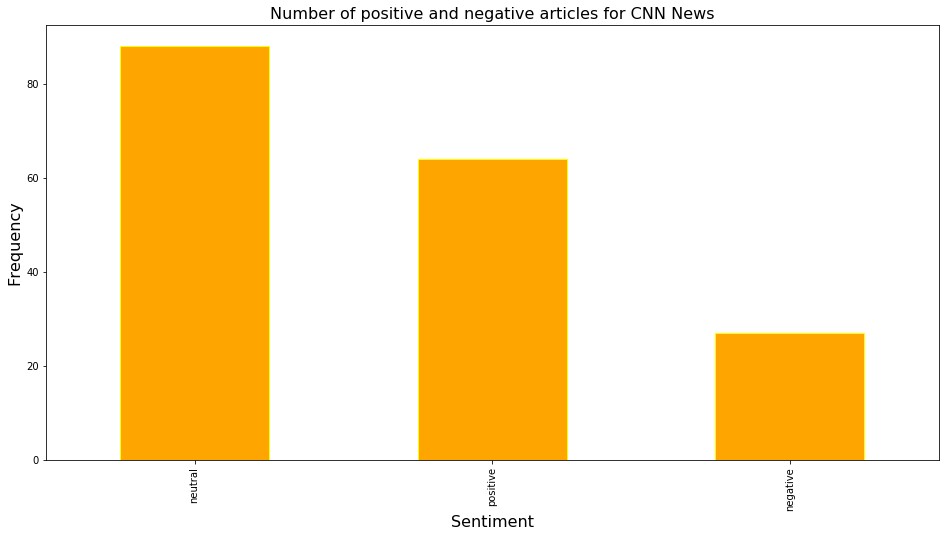

In [25]:
CNN_news_df['Sentiment'].value_counts().plot(kind='bar', figsize=[16,8], edgecolor='yellow', color='orange')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Number of positive and negative articles for CNN News', fontsize=16)
plt.show()

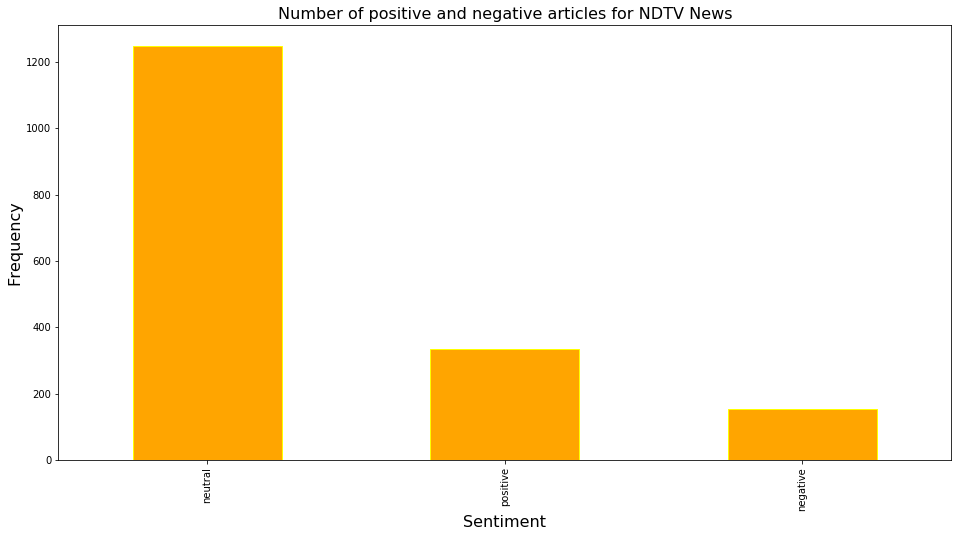

In [26]:
NDTV_news_df['Sentiment'].value_counts().plot(kind='bar', figsize=[16,8], edgecolor='yellow', color='orange')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Number of positive and negative articles for NDTV News', fontsize=16)
plt.show()

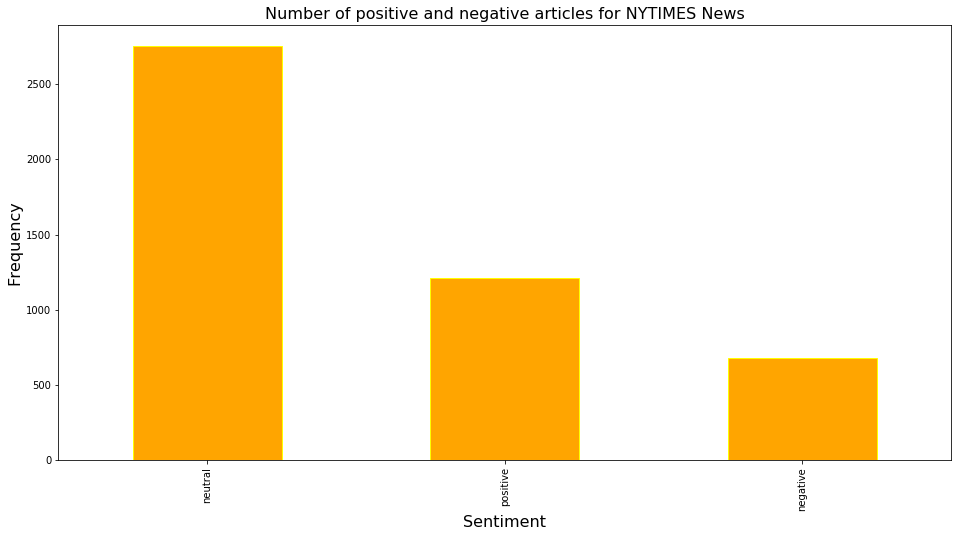

In [27]:
NYTIMES_news_df['Sentiment'].value_counts().plot(kind='bar', figsize=[16,8], edgecolor='yellow', color='orange')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Number of positive and negative articles for NYTIMES News', fontsize=16)
plt.show()

**From the above bar plots,we can understand that the articles that are neutral in nature are in majority compared to postive and negative articles for the three news channels.**

**Positive articles are more in number compared to negative articles for all the three news channels.**

## NUMBER OF POSITIVE AND NEGATIVE ARTICLES FOR EACH DAY (OF THE MONTH) FOR CNN NEWS 

In [28]:
article_info=[]
for i in range(1,31):
    article_info.append({'Day of the Month':i,'Number of positive articles':len(CNN_news_df.loc[(CNN_news_df.Sentiment=='positive')&(CNN_news_df['Day of the Month']==i)]),'Number of negative articles':len(CNN_news_df.loc[(CNN_news_df.Sentiment=='negative')&(CNN_news_df['Day of the Month']==i)])})

In [29]:
CNN_article_df=pd.DataFrame(article_info)

In [30]:
CNN_article_df.loc[(CNN_article_df['Number of positive articles']!=0)|(CNN_article_df['Number of negative articles']!=0)]

,Day of the Month,Number of positive articles,Number of negative articles
5,6,5,0
9,10,2,0
10,11,5,0
11,12,3,0
12,13,2,1
13,14,5,0
15,16,1,3
16,17,1,2
17,18,3,1
18,19,4,0


**The above shown dataframe has required data i.e, it has days with valid number of positive and negative articles for a given day of the month.**

## NUMBER OF POSITIVE AND NEGATIVE ARTICLES FOR EACH DAY (OF THE MONTH) FOR NDTV NEWS 

In [31]:
article_info=[]
for i in range(1,31):
    article_info.append({'Day of the Month':i,'Number of positive articles':len(NDTV_news_df.loc[(NDTV_news_df.Sentiment=='positive')&(NDTV_news_df['Day of the Month']==i)]),'Number of negative articles':len(NDTV_news_df.loc[(NDTV_news_df.Sentiment=='negative')&(NDTV_news_df['Day of the Month']==i)])})

In [32]:
NDTV_article_df=pd.DataFrame(article_info)

In [33]:
NDTV_article_df.head(30)

,Day of the Month,Number of positive articles,Number of negative articles
0,1,14,4
1,2,22,2
2,3,14,4
3,4,6,2
4,5,8,4
5,6,12,8
6,7,8,8
7,8,22,10
8,9,0,4
9,10,4,4


## NUMBER OF POSITIVE AND NEGATIVE ARTICLES FOR EACH DAY (OF THE MONTH) FOR NYTIMES NEWS 

In [34]:
article_info=[]
for i in range(1,31):
    article_info.append({'Day of the Month':i,'Number of positive articles':len(NYTIMES_news_df.loc[(NYTIMES_news_df.Sentiment=='positive')&(NYTIMES_news_df['Day of the Month']==i)]),'Number of negative articles':len(NYTIMES_news_df.loc[(NYTIMES_news_df.Sentiment=='negative')&(NYTIMES_news_df['Day of the Month']==i)])})

In [35]:
NYTIMES_article_df=pd.DataFrame(article_info)

In [36]:
NYTIMES_article_df.head(30)

,Day of the Month,Number of positive articles,Number of negative articles
0,1,30,15
1,2,42,26
2,3,43,39
3,4,47,28
4,5,53,29
5,6,39,22
6,7,43,20
7,8,21,21
8,9,48,18
9,10,46,30


# CLEANING HEADLINE TEXT

## Cleaning Headline Text of CNN news 

In [37]:
import nltk

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [39]:
from nltk.corpus import stopwords

In [40]:
stopwords_list = stopwords.words('English')

In [41]:
clean_messages = []

for i in range(CNN_news_df.shape[0]):
    clean_headline_text = ''
    current_text = word_tokenize(CNN_news_df['headline'].values[i])
    for word in current_text:
        if word == '@' or word == 'VirginAmerica' or word == 'United' or word == 'SouthwestAir' or word == 'USAirways' or word == 'americanair' or word == 'AmericanAir' or word == 'jetblue' or word == 'delta' or word == 'Delta':
            continue
        if not word in stopwords_list:
            clean_headline_text = clean_headline_text + ' ' + word
        
    clean_messages.append(clean_headline_text)

In [42]:
CNN_news_df['clean_headline_text']=clean_messages

In [43]:
CNN_news_df['clean_headline_text']=CNN_news_df['clean_headline_text'].apply(lambda x:" ".join(word.lower() for word in x.split()))

In [44]:
CNN_news_df['clean_headline_text']=CNN_news_df['clean_headline_text'].str.replace('[^\w\s]','')

In [45]:
from nltk.stem.wordnet import WordNetLemmatizer

In [46]:
wordnet = WordNetLemmatizer()

In [47]:
CNN_news_df['clean_headline_text']=CNN_news_df['clean_headline_text'].apply(lambda x:' '.join(wordnet.lemmatize(word) for word in x.split()))

In [48]:
CNN_news_df.head()

,website,url,headline,date,Day of the Month,Sentiment,Polarity,clean_headline_text
0,CNN,https://www.cnn.com/world/live-news/coronaviru...,8 cases of coronavirus confirmed in Colorado,03-6-20,6,positive,0.400000,8 case coronavirus confirmed colorado
1,CNN,https://www.cnn.com/world/live-news/coronaviru...,Kentucky confirms 1st coronavirus case,03-6-20,6,neutral,0.000000,kentucky confirms 1st coronavirus case
2,CNN,https://www.cnn.com/world/live-news/coronaviru...,Cruise passengers not told about coronavirus t...,03-6-20,6,neutral,0.000000,cruise passenger told coronavirus test result ...
3,CNN,https://www.cnn.com/world/live-news/coronaviru...,Son of nursing home resident with coronavirus ...,03-6-20,6,neutral,0.000000,son nursing home resident coronavirus describe...
4,CNN,https://www.cnn.com/world/live-news/coronaviru...,California's Santa Clara County confirms 4 new...,03-6-20,6,positive,0.136364,california s santa clara county confirms 4 new...


## Cleaning Headline Text of NDTV news 

In [49]:
clean_messages = []

for i in range(NDTV_news_df.shape[0]):
    clean_headline_text = ''
    current_text = word_tokenize(NDTV_news_df['headline'].values[i])
    for word in current_text:
        if word == '@' or word == 'VirginAmerica' or word == 'United' or word == 'SouthwestAir' or word == 'USAirways' or word == 'americanair' or word == 'AmericanAir' or word == 'jetblue' or word == 'delta' or word == 'Delta':
            continue
        if not word in stopwords_list:
            clean_headline_text = clean_headline_text + ' ' + word
        
    clean_messages.append(clean_headline_text)

NDTV_news_df['clean_headline_text']=clean_messages

NDTV_news_df['clean_headline_text']=NDTV_news_df['clean_headline_text'].apply(lambda x:" ".join(word.lower() for word in x.split()))

NDTV_news_df['clean_headline_text']=NDTV_news_df['clean_headline_text'].str.replace('[^\w\s]','')

from nltk.stem.wordnet import WordNetLemmatizer

#nltk.download('wordnet')

wordnet = WordNetLemmatizer()

NDTV_news_df['clean_headline_text']=NDTV_news_df['clean_headline_text'].apply(lambda x:' '.join(wordnet.lemmatize(word) for word in x.split()))

In [50]:
NDTV_news_df.head()

,website,url,headline,date,Day of the Month,Sentiment,Polarity,clean_headline_text
0,NDTV,https://www.ndtv.com/topic/march-1,Assam PAT 2020: Application Dates Extended Til...,03-1-20,1,neutral,0.000000,assam pat 2020 application date extended till ...
1,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus: RBI Extends Moratorium On Auto Lo...,03-1-20,1,positive,0.500000,coronavirus rbi extends moratorium on auto loa...
2,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus Lockdown: Skoda Grants Extension O...,03-1-20,1,positive,0.136364,coronavirus lockdown skoda grant extension of ...
3,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus Lockdown: CEAT Extends Warranty On...,03-1-20,1,neutral,0.000000,coronavirus lockdown ceat extends warranty on ...
4,NDTV,https://www.ndtv.com/topic/march-1,Coronavirus Pandemic: Porsche Extends Warranty...,03-1-20,1,neutral,0.000000,coronavirus pandemic porsche extends warranty ...


## Cleaning Headline Text of NYTIMES news 

In [51]:
clean_messages = []

for i in range(NYTIMES_news_df.shape[0]):
    clean_headline_text = ''
    current_text = word_tokenize(NYTIMES_news_df['headline'].values[i])
    for word in current_text:
        if word == '@' or word == 'VirginAmerica' or word == 'United' or word == 'SouthwestAir' or word == 'USAirways' or word == 'americanair' or word == 'AmericanAir' or word == 'jetblue' or word == 'delta' or word == 'Delta':
            continue
        if not word in stopwords_list:
            clean_headline_text = clean_headline_text + ' ' + word
        
    clean_messages.append(clean_headline_text)

NYTIMES_news_df['clean_headline_text']=clean_messages

NYTIMES_news_df['clean_headline_text']=NYTIMES_news_df['clean_headline_text'].apply(lambda x:" ".join(word.lower() for word in x.split()))

NYTIMES_news_df['clean_headline_text']=NYTIMES_news_df['clean_headline_text'].str.replace('[^\w\s]','')

from nltk.stem.wordnet import WordNetLemmatizer

#nltk.download('wordnet')

wordnet = WordNetLemmatizer()

NYTIMES_news_df['clean_headline_text']=NYTIMES_news_df['clean_headline_text'].apply(lambda x:' '.join(wordnet.lemmatize(word) for word in x.split()))

In [52]:
NYTIMES_news_df.head()

,website,url,headline,date,Day of the Month,Sentiment,Polarity,clean_headline_text
3,NYTIMES,https://www.irishtimes.com/static/articleindex...,Joe Biden wins crucial South Carolina primary ...,03-1-20,1,positive,0.258333,joe biden win crucial south carolina primary a...
4,NYTIMES,https://www.irishtimes.com/static/articleindex...,Teenage girl dies in single vehicle crash in C...,03-1-20,1,negative,-0.035714,teenage girl dy single vehicle crash co galway
5,NYTIMES,https://www.irishtimes.com/static/articleindex...,Storm Jorge: Flooding danger this week as rain...,03-1-20,1,neutral,0.000000,storm jorge flooding danger week rainfall filt...
6,NYTIMES,https://www.irishtimes.com/static/articleindex...,Thousands try to enter Greece after Turkey ope...,03-1-20,1,neutral,0.000000,thousand try enter greece turkey open border
7,NYTIMES,https://www.irishtimes.com/static/articleindex...,Coronavirus: UK confirms 36 cases as 13 more p...,03-1-20,1,positive,0.500000,coronavirus uk confirms 36 case 13 patient ide...


# LABEL ENCODING

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
CNN_news_df['Sentiment']=le.fit_transform(CNN_news_df['Sentiment'])

In [55]:
NDTV_news_df['Sentiment']=le.fit_transform(NDTV_news_df['Sentiment'])

In [56]:
NYTIMES_news_df['Sentiment']=le.fit_transform(NYTIMES_news_df['Sentiment'])

# Tfidf Vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [58]:
X_cnn = vectorizer.fit_transform(CNN_news_df['clean_headline_text'])

In [59]:
X_ndtv = vectorizer.fit_transform(NDTV_news_df['clean_headline_text'])

In [60]:
X_nytimes = vectorizer.fit_transform(NYTIMES_news_df['clean_headline_text'])

# LOGISTIC REGRESSION

## FOR CNN NEWS: 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [62]:
Y_cnn=CNN_news_df['Sentiment']

In [63]:
Y_ndtv=NDTV_news_df['Sentiment']

In [64]:
Y_nytimes=NYTIMES_news_df['Sentiment']

In [65]:
logreg=LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X_cnn,Y_cnn)
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
logreg.score(X_test,Y_test)

0.5555555555555556

## FOR NDTV NEWS: 

In [66]:
logreg=LogisticRegression()
Y=NDTV_news_df['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X_ndtv,Y_ndtv)
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
logreg.score(X_test,Y_test)

0.825287356321839

## FOR NYTIMES NEWS: 

In [67]:
logreg=LogisticRegression()
Y=NYTIMES_news_df['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X_nytimes,Y_nytimes)
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
logreg.score(X_test,Y_test)

0.6987951807228916

# SUPPORT VECTOR CLASSIFIER (SVC)

## FOR CNN NEWS: 

In [68]:
from sklearn.svm import SVC
svc=SVC() 

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_cnn,Y_cnn)
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test) 

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(Y_test,y_pred)

0.5777777777777777

## FOR NDTV NEWS: 

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ndtv,Y_ndtv)
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test) 

In [73]:
accuracy_score(Y_test,y_pred)

0.960919540229885

## FOR NYTIMES NEWS: 

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_nytimes,Y_nytimes)
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test) 

In [75]:
accuracy_score(Y_test,y_pred)

0.6798623063683304

# DECISION TREE CLASSIFIER

## FOR CNN NEWS: 

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
clf = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X_cnn,Y_cnn)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
y_pred=clf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.6

## FOR NDTV NEWS: 

In [79]:
clf = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X_ndtv,Y_ndtv)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
y_pred=clf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9632183908045977

## FOR NYTIMES NEWS: 

In [81]:
clf = DecisionTreeClassifier()
X_train, X_test, Y_train, Y_test = train_test_split(X_nytimes,Y_nytimes)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
y_pred=clf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8339070567986231